# Dá para cortar?

Antes mesmo da epidemia chegar ao município de Feira de Santana,
a Câmara de Vereadores já era conhecida por seus gastos extravagantes.
A casa já chegou a gastar, de uma só vez, [17.767,60 em iogurtes][1]
e disponibilizar 60 linhas de telefone celular para uso dos vereadores ,
apesar dos gastos [R$ 40 mil anuais com a Telemar][1].

[1]: https://www.blogdovelame.com/camara-de-feira-ja-chegou-a-comprar-616-unidades-de-iogurte-de-uma-so-vez/
[2]: https://www.blogdovelame.com/camara-de-feira-disponibiliza-60-linhas-de-telefone-celular-para-uso-dos-vereadores/


Muitas Câmaras tem se mobilizado para cortar gastos e repassar a verba
para que a prefeitura utilize nos esforços para conter a pandemia.

Nesse texto vamos conhecer um pouco melhor as despesas da Câmara e
o que pode ser cortado para ajudar o município na crise do COVID-19.

## As despesas da Câmara Municipal

Antes, vamos entender um pouco sobre as despesas, segundo a própria Câmara:

> São todos os gastos feitos pela Câmara. As Despesas são divididas em:

> - Despesas correntes. Aquelas necessárias à manutenção dos serviços públicos, como as despesas com material de consumo, telefone, pessoal, serviços de terceiros, etc.
> - Despesas de capital. São os investimentos, ou seja, gastos com novos equipamentos e obras, como construção e reforma de escolas, hospitais, postos de saúde, pavimentação, etc.
Os registros de classificação da despesa são efetuados por meio de rotinas específicas e de forma geral podem ser assim tratadas:

> - Valor Orçado (Dotação Orçamentária) - Dependem de autorização legislativa e correspondem ao valor a ser utilizado para a manutenção da Administração Pública;
> - Valor Empenhado - Consiste na reserva da dotação orçamentária para um fim específico, devendo registrar o nome/razão social do credor, valor e descrição do que será pago;
> - Valor Liquidado - Registra efetivamente a despesa executada. No entanto, por ocasião do encerramento do exercício, conforme as normas da Lei Federal n° 4.320/1964, as despesas empenhadas e ainda não liquidadas são inscritas em restos a pagar não processados;
> - Valor Pago - Consiste na entrega do numerário ao credor e só pode ser efetuado após regular liquidação da despesa.

Fonte: https://www.transparencia.feiradesantana.ba.leg.br/index.php?view=despesasinfo

No [portal da transparência](https://www.transparencia.feiradesantana.ba.leg.br/index.php?view=despesasinfo)
podemos verificar os gastos nas três fases: empenho, liquidação e pagamento. Cada despesa
apresenta também as seguintes informações:

![](images/despesa.png)

* Data
* Fase
* Credor (Empresa ou pessoa física)
* Valor
* Número
* Documento (o CPF ou CNPJ da empresa ou pessoa)
* Número do processo
* Bem / Serviço prestado
* Natureza
* Função
* Subfunção
* Processo licitatório
* Fonte de recurso

Mas como saber qual valor pode ser gasto pelo município durante o ano?

## Lei Orçamentária

O valor que o município pode gastar, bem como a receita esperada, é estabelecido
pela Lei Orçamentária Anual (LOA). Todos os anos o município deve estabelecer um orçamento
para o ano seguinte. Saiba mais sobre isso [aqui](https://www.politize.com.br/ppa-ldo-loa-3-siglas-que-definem-orcamento-governo/).

Embora esteja publicada no diário oficial, a LOA de Feira de Santana não foi encontrada
facilmente nos portais da transparência da prefeitura e da câmara. Você pode acessá-la
[aqui](http://www.diariooficial.feiradesantana.ba.gov.br/atos/executivo/1JE1WJ2162019.pdf).


In [35]:
from bokeh.plotting import figure, show
import bokeh.io
from bokeh.models import BasicTickFormatter, ColumnDataSource
from bokeh.models.tools import HoverTool
from bokeh.palettes import Spectral3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

bokeh.io.reset_output()
bokeh.io.output_notebook

despesas = pd.read_csv('despesas-camara.csv')
columns = ['crawled_at', 'crawled_from']
despesas.drop(columns, inplace=True, axis=1)
despesas.head()

,company_or_person,date,document,function,group,legal_status,number,phase,process_number,published_at,resource,subfunction,subgroup,summary,type_of_process,value
0,EDITORA PRINCESA LTDA,2010-01-04,00.725.755/0001-62,01 - LEGISLATIVA,Manutencao dos servicos tecnico administrativos,339039680000 - Serv.de Publicidade e propagand...,062/2010,empenho,029/2010,2010-01-04,0000 - TESOURO,031 - ACAO,Serv.de Publicidade e propaganda,IMPORTE DESTINADO PUBLICACAO DE ATOS OFICIAIS ...,DISPENSA,130.00
1,CEDRO EDITORA GRAFICA LTDA,2010-01-04,00.597.920/0001-30,01 - LEGISLATIVA,Manutencao dos servicos tecnico administrativos,339039680000 - Serv.de Publicidade e propagand...,063/2010,empenho,030/2010,2010-01-04,0000 - TESOURO,031 - ACAO,Serv.de Publicidade e propaganda,IMPORTE DESTINADO A PUBLICACAO DE ATOS OFICIAI...,DISPENSA,360.00
2,ELEVADORES OTIS LTDA,2010-01-04,02.973.973/0010-01,01 - LEGISLATIVA,Manutencao dos servicos tecnico administrativos,339039150000 - Manut.e Conserv.de Maq.e Equipa...,041/2010,empenho,019/2010,2010-01-04,0000 - TESOURO,031 - ACAO,Manut.e Conserv.de Maq.e Equipament,IMPORTE DESTINADO A PAGAMENTO DE SERVICO DE MA...,DISPENSA,5166.72
3,EMPR. BRAS. DE CORREIOS E TELE,2010-01-04,03.402.831/3861-17,01 - LEGISLATIVA,Manutencao dos servicos tecnico administrativos,339039740000 - Outros Serv. de Terc.-P. Juridi...,042/2010,empenho,020/2010,2010-01-04,0000 - TESOURO,031 - ACAO,Outros Serv. de Terc.-P. Juridica,IMPORTE DESTINADO A PAGAMENTO DE SERVICO DE CO...,DISPENSA,35000.00
4,COMANDOS TERC. E SEG. ELETR. L,2010-01-04,00.046.493/0001-07,01 - LEGISLATIVA,Manutencao dos servicos tecnico administrativos,339039600000 - Vigilancia Ostensiva ...,021/2010,empenho,013/2010,2010-01-04,0000 - TESOURO,031 - ACAO,Vigilancia Ostensiva,IMPORTE DESTINADO A PAGAMENTO ...,DISPENSA,2260.00


In [36]:
despesas.shape

(35535, 16)

In [37]:
# import pandas_profiling
# pandas_profiling.ProfileReport(despesas)

In [38]:
despesas["date"] = pd.to_datetime(despesas["date"])
despesas2020 = despesas[despesas["date"].isin(pd.date_range("2020-01-01", "2020-04-01"))]
despesas2019 = despesas[despesas["date"].isin(pd.date_range("2019-01-01", "2019-12-31"))]
despesas2020 = despesas2020.sort_values('date', ascending=False)
despesas2019 = despesas2019.sort_values('date', ascending=False)

In [39]:
despesas2019.head()

,company_or_person,date,document,function,group,legal_status,number,phase,process_number,published_at,resource,subfunction,subgroup,summary,type_of_process,value
34863,FUNCIONARIOS EFETIVOS,2019-12-27,14.488.415/0001-60,01 - LEGISLATIVA,Administracao de pessoal e encargos,319011010000 - V.Vant.Fixas P.Civil(Ve.Base Fo...,01814-19,liquidacao,NaN,2019-12-27,0000 - TESOURO,031 - ACAO,V.Vant.Fixas P.Civil(Ve.Base Folha),"REF. A VENCIMENTOS DOS SERVIDORES EFETIVOS, FO...",ISENTO,39404.46
34862,FUNCIONARIOS CARGOS EM COMISSA,2019-12-27,14.488.415/0001-60,01 - LEGISLATIVA,Administracao de pessoal e encargos,319011010000 - V.Vant.Fixas P.Civil(Ve.Base Fo...,01813-19,liquidacao,NaN,2019-12-27,0000 - TESOURO,031 - ACAO,V.Vant.Fixas P.Civil(Ve.Base Folha),REF. A VENCIMENTOS DOS SERVIDORES CARGOS EM CO...,ISENTO,18784.12
34861,CAIXA ECONOMICA FEDERAL,2019-12-27,00.360.305/1611-16,01 - LEGISLATIVA,Manutencao dos servicos tecnico administrativos,339039999300000000 - Serviços Bancários ...,19000581,empenho,NaN,2019-12-27,0000 - TESOURO,031 - ACAO,Serviços Bancários,ANULACAO PARCIAL DO EMPENHO DE NUMERO 19000533,ISENTO,-328.89
34899,EMPRESTIMO CEF,2019-12-27,14.488.415/0001-60,NaN,NaN,NaN,01816-19,pagamento,NaN,2019-12-27,NaN,NaN,NaN,PAGAMENTO EXTRA-ORCAMENTARIO NUMERO:000403,NaN,37753.71
34898,I.R.R.F. - FOLHA,2019-12-27,14.488.415/0001-60,NaN,NaN,NaN,01815-19,pagamento,NaN,2019-12-27,NaN,NaN,NaN,PAGAMENTO EXTRA-ORCAMENTARIO NUMERO:000402,NaN,2076.69


In [40]:
despesas2020.head()

,company_or_person,date,document,function,group,legal_status,number,phase,process_number,published_at,resource,subfunction,subgroup,summary,type_of_process,value
35395,L.C. ESTRELA DO VALE-ME,2020-03-23,20.908.030/0001-08,01 - LEGISLATIVA,Manutencao dos servicos tecnico administrativos,339039220000000000 - Serviços prestados por em...,018/2020,empenho,011/2020,2020-03-23,0000 - TESOURO,031 - ACAO,Serviços prestados por empresas especializadas...,ASSESSORIA CONTÁBIL EM GESTÃO PÚBLICA PARA DE...,DISPENSA,16800.00
35396,UNIMED SEGURADORA SA,2020-03-23,92.863.505/0001-06,01 - LEGISLATIVA,Manutencao dos servicos tecnico administrativos,339039940000000000 - Seguros em Geral ...,030/2020,empenho,016/2020,2020-03-23,0000 - TESOURO,031 - ACAO,Seguros em Geral,SEGURO DE VIDA PARA OS ESTAGIÁRIOS DA CMFSA,DISPENSA,4043.14
35394,MANUPA COMERCIO DE EQUIPAMENTOS E FERRAMENTAS ...,2020-03-23,03.093.776/0003-53,01 - LEGISLATIVA,Manutencao dos servicos tecnico administrativos,449052020000000000 - Bens Moveis- Veiculos e E...,168/2019,empenho,001/2020,2020-03-23,0000 - TESOURO,031 - ACAO,Bens Moveis- Veiculos e Embarcaçoes,AQUISIÇÃO DE 02 VEÍCULOS CONFORME LICITAÇÃO 00...,PREGAO,123000.00
35491,VEREADORES,2020-03-20,14.488.415/0001-60,01 - LEGISLATIVA,Administracao da acao legislativa,319011010000 - V.Vant.Fixas P.Civil(Ve.Base Fo...,00261-20,liquidacao,NaN,2020-03-20,0000 - TESOURO,031 - ACAO,V.Vant.Fixas P.Civil(Ve.Base Folha),"REF A SUBSÍDIOS DOS VEREADORES, MÊS DE MARÇO/2...",ISENTO,15031.76
35490,VEREADORES,2020-03-20,14.488.415/0001-60,01 - LEGISLATIVA,Administracao da acao legislativa,319011010000 - V.Vant.Fixas P.Civil(Ve.Base Fo...,00260-20,liquidacao,NaN,2020-03-20,0000 - TESOURO,031 - ACAO,V.Vant.Fixas P.Civil(Ve.Base Folha),REF. A SUBSÍDIOS DOS VEREADORES - FOLHA COMPLE...,ISENTO,2505.29


### Com o que a Câmara anda gastando?

Agora que já sabemos as informações que temos e onde encontrá-las,
vamos dar uma olhadinha nos gastos da casa no último ano.

In [41]:
from bokeh.io import output_notebook

despesas2019['date'] = pd.to_datetime(despesas2019['date'])
source = ColumnDataSource(despesas2019)
date = source.data['date'].tolist()

p = figure(plot_width=800, plot_height=250, x_axis_type="datetime")
p.yaxis.formatter = BasicTickFormatter(use_scientific=False)
p.line(despesas2019['date'], despesas2019['value'], color='navy', alpha=0.5)
show(p)

despesas2020['date'] = pd.to_datetime(despesas2020['date'])
source = ColumnDataSource(despesas2020)
date = source.data['date'].tolist()

p = figure(plot_width=800, plot_height=250, x_axis_type="datetime")
p.yaxis.formatter = BasicTickFormatter(use_scientific=False)
p.line(despesas2020['date'], despesas2020['value'], color='navy', alpha=0.5)
show(p)

O que são esses picos?

* Dia 01 de Janeiro é um feriado nacional mas, em 2020, a Câmara registrou um único pagamento a Feira Cópias
* Janeiro registrou atividade nos pagamentos durante apenas 4 dias


## Analisando as categorias dos gastos


In [42]:
categories = pd.read_csv('categorias.csv')
categories.describe()

,subgroup,cleaned_subgroup,suggested_group
count,157,157,157
unique,157,80,30
top,Materiais de Consumo - uniformes e fardamentos,Outros serviços de terceiros - pessoa jurídica,Material de consumo
freq,1,10,44


In [43]:
despesas['suggested_group'] = despesas['subgroup'].map(categories.set_index('subgroup')['suggested_group'])
despesas['cleaned_subgroup'] = despesas['subgroup'].map(categories.set_index('subgroup')['cleaned_subgroup'])
despesas[['subgroup', 'cleaned_subgroup', 'suggested_group', 'summary']].head()

,subgroup,cleaned_subgroup,suggested_group,summary
0,Serv.de Publicidade e propaganda,Publicidade e Propaganda,Publicidade e Propaganda,IMPORTE DESTINADO PUBLICACAO DE ATOS OFICIAIS ...
1,Serv.de Publicidade e propaganda,Publicidade e Propaganda,Publicidade e Propaganda,IMPORTE DESTINADO A PUBLICACAO DE ATOS OFICIAI...
2,Manut.e Conserv.de Maq.e Equipament,Manutenção e Conservação de Máquinas e equipam...,Manutenção e conservação,IMPORTE DESTINADO A PAGAMENTO DE SERVICO DE MA...
3,Outros Serv. de Terc.-P. Juridica,Outros serviços de terceiros - pessoa jurídica,Serviços de terceiros,IMPORTE DESTINADO A PAGAMENTO DE SERVICO DE CO...
4,Vigilancia Ostensiva,Vigilância,Vigilância,IMPORTE DESTINADO A PAGAMENTO ...


In [44]:
field = 'suggested_group'

value_by_subgroups = despesas.groupby(field).sum()
source = ColumnDataSource(value_by_subgroups)
suggested_groups = source.data[field].tolist()

p = figure(x_range=suggested_groups, plot_height=350, title="Gastos por Subgrupo",
           toolbar_location=None, tools="")
p.yaxis.formatter = BasicTickFormatter(use_scientific=False)
p.xaxis.major_label_orientation = "vertical"

p.vbar(x=field, top='value', source=source, width=0.70)

p.xgrid.grid_line_color = None
p.y_range.start = 0

hover = HoverTool()
hover.tooltips = [("Total", "Total @value{float}")]
hover.mode = 'vline'

p.add_tools(hover)

show(p)

In [46]:
despesas['month'] = despesas['date'].apply(lambda x : x.month)

pd.pivot_table(
    despesas, 
    values='value',
    index=['subgroup'],
    columns='month',
    aggfunc=np.sum
).sort_values(by='subgroup', ascending=False)


month,1,2,3,4,5,6,7,8,9,10,11,12
subgroup,,,,,,,,,,,,
manuntencao de Software,NaN,1000.00,500.00,NaN,NaN,NaN,NaN,237.00,NaN,NaN,NaN,NaN
aquisicao e materiais de Escritorio,NaN,NaN,NaN,1245.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Vigilancia Ostensiva,3.361750e+03,1101.75,NaN,6186.75,1101.75,1101.75,1101.75,1101.75,1101.75,NaN,1638.50,NaN
Venc.e Vant.Fixas Pessoal Civil,7.080047e+06,750958.55,857147.30,825786.84,845645.02,1050287.49,820088.30,823899.06,819044.83,828539.92,829364.33,NaN
Vale refeição/vale alimentação,NaN,NaN,800000.00,215712.46,263976.88,273826.79,276781.73,269886.82,269886.83,526931.86,266931.86,521449.58
VENC E VANT FIXAS P.C.( BASE-FOLHA),1.640099e+07,1810328.43,1950150.46,2124161.30,2175969.27,2709160.79,2174674.29,2241014.87,2146589.29,2305185.35,2310712.24,2537037.07
V.Vant.Fixas P.Civil(Ve.Base Folha),1.398320e+08,15438596.51,16983079.50,14426010.08,14945235.07,18805372.70,14809574.32,14920623.85,15774380.83,14867105.56,15548354.65,22012691.79
V.Vant.F.Pes. Civil(Gratific Folha),4.300000e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-43000.00
Transp. de Residuos Sólidos (Lixo),6.636700e+03,1316.70,1316.70,1316.70,1316.70,NaN,2633.40,1316.70,NaN,NaN,NaN,NaN


## Quem foram os fornecedores?

In [47]:
pd.pivot_table(
    despesas, 
    values='value',
    index=['company_or_person'],
    columns='month',
    aggfunc=np.sum
).sort_values(by='company_or_person', ascending=False)


month,1,2,3,4,5,6,7,8,9,10,11,12
company_or_person,,,,,,,,,,,,
ZEU MOVEIS E ESCRITORIO LTDA,NaN,NaN,3960.00,1980.00,NaN,NaN,3000.00,NaN,NaN,NaN,2850.00,NaN
YASUDA MARÍTIMA SEGUROS S.A,NaN,NaN,NaN,9023.19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
WINCO SISTEMAS LTDA.,NaN,NaN,NaN,NaN,NaN,2328.92,4657.84,NaN,NaN,NaN,NaN,NaN
WELLINGTON WANDERLEY DE MORAES,NaN,4380.00,1125.00,NaN,3465.00,950.00,5410.00,-780.00,NaN,625.00,750.00,2475.00
WELLINGTON NEDSON CARVALHO SILVA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1500.00,NaN,NaN,-197.03
WELLINGTON ANDRADE DE JESUS,NaN,NaN,NaN,NaN,1800.00,6750.00,NaN,NaN,NaN,17550.00,NaN,NaN
WELLIGTON ANDRADE DE JESUS,NaN,NaN,NaN,3960.00,3600.00,7200.00,15255.00,-1800.00,NaN,600.00,NaN,375.00
WEIMAR DES. E CONSULT. EM INF.,25893.00,5998.00,3899.00,3899.00,6897.80,2599.20,3899.00,3649.10,1899.80,3899.00,1750.30,-6698.60
WASHINGTON DE JESUS SOUZA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,300.00,594.00,NaN,NaN,NaN


In [48]:
def to_csv(despesas, arquivo='todas-as-despesas-desde-2016.csv'):
    despesas.to_csv(
        arquivo,
        index=False,
        columns=["published_at", "phase", "company_or_person", "value", "number", "document", "date", "process_number", "summary", "group", "function", "subfunction", "type_of_process", "resource"],
        header=["publicado_em", "fase", "empresa_ou_pessoa", "valor", "numero", "documento", "data", "numero_do_processo", "sumario", "grupo", "funcao", "subfuncao", "type_of_process", "fonte"]
    )

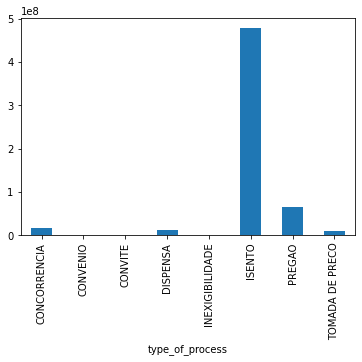

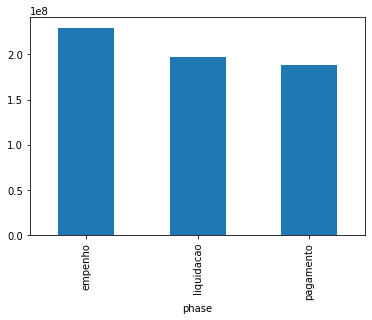

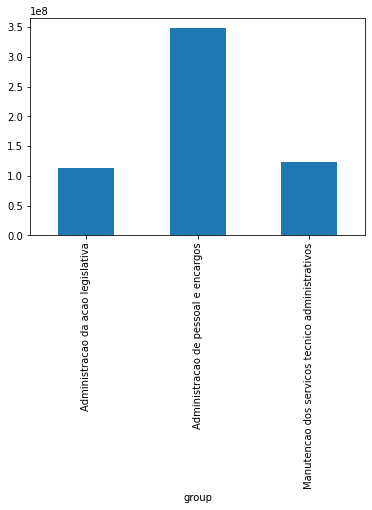

In [49]:
despesas.groupby('type_of_process')['value'].sum().plot(kind='bar')
plt.show()

despesas.groupby('phase')['value'].sum().plot(kind='bar')
plt.show()

despesas.groupby('group')['value'].sum().plot(kind='bar')
plt.show()

In [50]:
despesas.group.value_counts()

Manutencao dos servicos tecnico administrativos    23495
Administracao de pessoal e encargos                 8869
Administracao da acao legislativa                    871
Name: group, dtype: int64

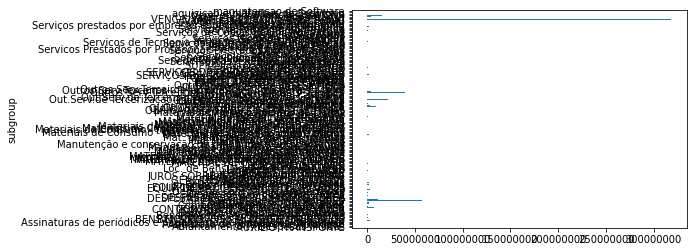

In [51]:
from matplotlib.ticker import FormatStrFormatter

plt.ylim(20)
ax = plt.gca()
ax.xaxis.set_major_formatter(FormatStrFormatter('%.0f'))

despesas.groupby('subgroup')['value'].sum().plot(kind='barh')

plt.show()

In [52]:
despesas.subgroup.value_counts()

Outros Serv.Terceiros - P. Juridica                             7040
Diarias-Civil                                                   5441
OUTROS SERVICOS TERC. P.JURIDICA                                2124
V.Vant.Fixas P.Civil(Ve.Base Folha)                             1470
Materiais de Consumo - Outros                                   1266
Publicidades e Propaganda                                       1195
DIARIAS - CIVIL                                                 1023
Serviços de Telefonia                                            796
Auxilio - Transporte                                             655
Cont.p/Reg.Geral Prev.INSS                                       645
PUBLICIDADE E PROPAGANDA                                         557
Serviços Bancários                                               429
Locaçao de Software                                              414
PARCELAMENTO IPFS CAMARA                                         408
Material P/manuntençao de Veiculos

In [53]:
despesas.phase.value_counts()

pagamento     15721
liquidacao    13714
empenho        6100
Name: phase, dtype: int64

In [54]:
pd.set_option('display.max_rows', 1000)
despesas.company_or_person.value_counts()

CAIXA ECONOMICA FEDERAL                                         2304
IPFS - INST. DE PREV. DOS SERV                                  1450
JAIRO DOMINGOS SANTOS                                           1135
INSS - INST. NAC. DE SEG. SOCI                                  1030
BRADESCO                                                        1022
FUNCIONARIOS CARGOS EM COMISSA                                   948
MANOEL LUIS SENA DA CRUZ                                         880
CEDRO EDITORA GRAFICA LTDA                                       750
FUNCIONARIOS EFETIVOS                                            734
JOSE AUGUSTO DOS SANTOS                                          724
ELIAS RIBEIRO AZEVEDO                                            594
FUNCIONARIOS  A DISPOSICAO                                       528
EDITORA PRINCESA LTDA                                            512
REDE GERAL SERVIÇOS LTDA ME                                      464
VEREADORES                        

In [55]:
despesas['value'] = pd.to_numeric(despesas['value'])
despesas.groupby(['company_or_person']).sum().groupby(level=[0])['value'].cumsum().sort_values(ascending=False)

company_or_person
FUNCIONARIOS CARGOS EM COMISSA                                  2.119158e+08
VEREADORES                                                      9.316235e+07
FUNCIONARIOS EFETIVOS                                           6.943081e+07
INSS - INST. NAC. DE SEG. SOCI                                  6.427532e+07
GREEN CARD S/A REFEIÇÕES COMER                                  2.407086e+07
IPFS - INST. DE PREV. DOS SERV                                  2.371703e+07
ATIVACOOP COOPERATIVA DE TRABALHO DE ATIVIDADES GERAIS DA BA    1.574677e+07
ESFERA PRODUÇÃO E EVENTOS EIRELI-ME                             8.532268e+06
I.R.R.F. - FOLHA                                                8.237852e+06
NUTRICASH SERVICOS LTDA.                                        7.977697e+06
SERVICECOOP COOP. DE SERV. PRO                                  6.836801e+06
I.N.S.S - FOLHA                                                 5.874544e+06
EMPRESTIMO CEF                                            

## O que a Câmara consome mais em cada categoria?

In [56]:
import numpy as np
import pandas as pd

import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

import spacy
from spacy.lemmatizer import Lemmatizer
from spacy.lang.pt.stop_words import STOP_WORDS
import pt_core_news_sm

from tqdm import tqdm_notebook as tqdm
from pprint import pprint

In [57]:
nlp = spacy.load("pt_core_news_sm")

stop_list = ["REF","A","E","I","O","U", "Nº", "LTDA"]
nlp.Defaults.stop_words.update(stop_list)
for word in STOP_WORDS:
    lexeme = nlp.vocab[word]
    lexeme.is_stop = True

def lemmatizer(doc):
    doc = [token.lemma_ for token in doc if token.lemma_ != '-PRON-']
    doc = u' '.join(doc)
    return nlp.make_doc(doc)

def remove_stopwords(doc):
    doc = [
        token.text
        for token in doc
        if token.is_stop != True and token.is_punct != True
    ]
    return doc

nlp.add_pipe(lemmatizer,name='lemmatizer',after='ner')
nlp.add_pipe(remove_stopwords, name="stopwords", last=True)

In [58]:
def topics_from_text(text, num_words=5):
    doc_list = []
    for doc in tqdm(text):
        pr = nlp(doc)
        doc_list.append(pr)

    words = corpora.Dictionary(text)
    corpus = [words.doc2bow(doc) for doc in doc_list]

    lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                               id2word=words,
                                               num_topics=3, 
                                               random_state=2,
                                               update_every=1,
                                               passes=10,
                                               alpha='auto',
                                               per_word_topics=True)
    return lda_model.print_topics(num_words=num_words)


In [59]:
from collections import Counter


def most_common_words(complete_text):
    doc = nlp(complete_text)
    words = [
        token.text
        for token in doc
        if not token.is_stop and not token.is_punct
    ]
    word_freq = Counter(words)
    return word_freq.most_common(5)

summaries_by_subgroup = {}
for group_name, df_group in despesas.groupby('subgroup'):
    summaries = []
    for row_index, row in df_group.iterrows():
        summaries.append(row['summary'])
    summaries_by_subgroup[group_name] = summaries  # u' '.join(summaries)

In [60]:
for subgroup, all_summaries in summaries_by_subgroup.items():
    print(f'>>>>> {subgroup}')
    print('--- Topics')
    print(all_summaries)
    pprint(topics_from_text(all_summaries, num_words=5))


>>>>> AUXILIO TRANSPORTE
--- Topics
['IMPORTE DESTINADO A PAGAMENTO DE AUXILIO TRANSPORTE NO PERIODO.', 'IMPORTE DESTINADO A PAGAMENTO DE AUXILIO TRANSPORTE NO PERIODO.', 'IMPORTE DESTINADO A PAGAMENTO DE AUXILIO TRANSPORTE NO PERIODO.', 'REFERE-SE AO AUXÍLIO TRANSPORTE PARA OS SERVIDORES EFETIVOS, INCLUSOS NA FOLHA DE PAGAMENTO DO MÊS DE JANEIRO/2011.', 'REFERE-SE AO AUXÍLIO TRANSPORTE PARA OS FUNCIONÁRIOS À DISPOSIÇÃO DESTA CASA LEGISLATIVA, INCLUSO NA FOLHA DE PAGAMENTO NO MÊS DE JANEIRO/2011.', 'REFERE-SE AO AUXÍLIO TRANSPORTE PARA OS FUNCIONÁRIOS CARGO EM COMISSÃO DESTA CASA LEGISLATIVA, INCLUSO NA FOLHA DE PAGAMENTO NO MÊS DE JANEIRO/2011.', 'REFERE-SE AO AUXÍLIO TRANSPORTE PARA OS SERVIDORES EFETIVOS, INCLUSOS NA FOLHA DE PAGAMENTO DO MÊS DE JANEIRO/2011.', 'REFERE-SE AO AUXÍLIO TRANSPORTE PARA OS FUNCIONÁRIOS À DISPOSIÇÃO DESTA CASA LEGISLATIVA, INCLUSO NA FOLHA DE PAGAMENTO NO MÊS DE JANEIRO/2011.', 'REF. AO AUXÍLIO TRANSPORTE PARA OS FUNCIONÁRIOS À DISPOSIÇÃO DESTA CASA LEGIS

<ipython-input-58-9939d327646b>:3: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for doc in tqdm(text):


TypeError: doc2bow expects an array of unicode tokens on input, not a single string